# Historical Simulation

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
data = pd.read_csv('dataset.csv', index_col=0)
data.index = pd.to_datetime(data.index)

In [132]:
relative_weights = [0.3, 0.3, 0.01, 0.09, 0.3]
absolute_weights = [300000, 300000, 10000, 90000, 300000]

In [133]:
stock_returns = np.log(data[['SPY', 'AEX', 'RDSA.AS', 'HSI']]).diff()
stock_returns[['SPY', 'HSI']] + np.log(data[['USDEUR', 'HKDEUR']]).diff().values
yields = data['YIELDS'] / 100

In [134]:
# Real losses

losses = np.exp(stock_returns) - 1
until_maturity = pd.Series(np.arange(12, 0, -1/(250))[:len(data)])
until_maturity.index = data.index
losses['bonds'] = np.exp(-until_maturity * yields.diff() + (yields + yields.diff()) / 250) - 1
losses = -losses

In [135]:
total_losses = (losses * relative_weights).sum(axis=1)
total_losses = total_losses * 1000000

In [136]:
#total losses last 5 years
middle_index = len(total_losses)//2
total_losses_5 = total_losses[:middle_index]
total_losses_5

Date
2010-01-01       0.000000
2010-01-04     -45.230989
2010-01-05   -2816.179095
2010-01-06     519.470851
2010-01-07   -1156.073392
                 ...     
2015-02-24   -3305.984386
2015-02-25      83.749004
2015-02-26   -3423.102147
2015-02-27     697.554307
2015-03-02   -2943.528445
Length: 1496, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

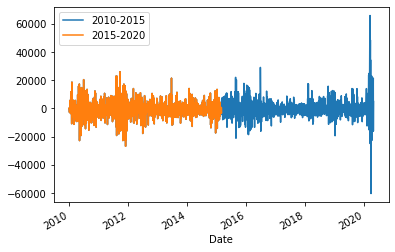

In [137]:
total_losses.plot(label="2010-2015")
total_losses_5.plot(label="2015-2020")
plt.legend()
plt.show

In [138]:
total_losses = total_losses.sort_values(ascending=True)
total_losses

Date
2020-03-24   -60337.382754
2011-11-30   -26846.715089
2020-03-13   -24911.108034
2010-05-09   -22844.877378
2011-11-28   -22839.365463
                  ...     
2016-06-24    29070.884383
2020-03-18    34417.716835
2020-03-16    48484.621927
2020-03-09    51869.120301
2020-03-12    65859.592980
Length: 2992, dtype: float64

In [139]:
total_losses_5 = total_losses_5.sort_values(ascending=True)
total_losses_5

Date
2011-11-30   -26846.715089
2010-05-09   -22844.877378
2011-11-28   -22839.365463
2011-10-27   -22794.950641
2010-05-27   -19202.834708
                  ...     
2013-06-20    21512.068886
2011-08-07    22777.725349
2011-08-18    22817.675719
2011-08-04    22889.192143
2011-09-22    26035.979010
Length: 1496, dtype: float64

In [140]:
var_97 = total_losses.quantile(0.025)
var_99 = total_losses.quantile(0.01)

var_97_5 = total_losses_5.quantile(0.025)
var_99_5 = total_losses_5.quantile(0.01)

print("10 Years:\n",
"Var 97.5%:\t", var_97, "\n Var 99%:\t", var_99)
print("5 Years:\n",
"Var 97.5%:\t", var_97_5, "\n Var 99%:\t", var_99_5)

10 Years:
 Var 97.5%:	 -10989.106928191306 
 Var 99%:	 -14467.634754846425
5 Years:
 Var 97.5%:	 -10995.8352828227 
 Var 99%:	 -14179.6265717682


In [141]:
ES_97 = total_losses[total_losses <= var_97].mean()
ES_99 = total_losses[total_losses <= var_99].mean()

ES_97_5 = total_losses_5[total_losses_5 <= var_97_5].mean()
ES_99_5 = total_losses_5[total_losses_5 <= var_99_5].mean()


print("10 Years:\n",
"ES 97.5%:\t", ES_97, "\n ES 99%:\t", ES_99)
print("5 Years:\n",
"ES 97.5%:\t", ES_97_5, "\n ES 99%:\t", ES_99_5)

10 Years:
 ES 97.5%:	 -15550.682130929024 
 ES 99%:	 -20187.17653549373
5 Years:
 ES 97.5%:	 -14747.369787618523 
 ES 99%:	 -18633.94543091174


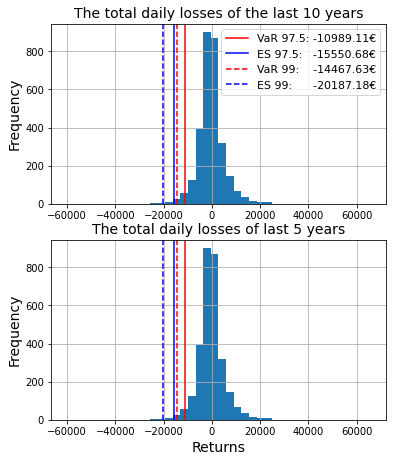

In [156]:
plt.subplot(211)
plt.title("The total daily losses of the last 10 years", fontsize=14)
plt.hist(total_losses, bins=40)
plt.ylabel('Frequency',fontsize=14)
plt.grid(True)
plt.axvline(x=var_97, color="r", linestyle="-", label='VaR 97.5: {0:.2f}€'.format(var_97))
plt.axvline(x=ES_97, color='b', linestyle='-', label='ES 97.5:   {0:.2f}€'.format(ES_97))
plt.axvline(x=var_99, color="r", linestyle="--", label='VaR 99:    {0:.2f}€'.format(var_99))
plt.axvline(x=ES_99, color='b', linestyle='--', label='ES 99:      {0:.2f}€'.format(ES_99))
plt.legend(fontsize=11)

plt.subplot(212)
plt.title("The total daily losses of last 5 years", fontsize=14)
plt.hist(total_losses, bins=40)
plt.xlabel('Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.axvline(x=var_97, color="r", linestyle="-")
plt.axvline(x=ES_97, color='b', linestyle='-')
plt.axvline(x=var_99, color="r", linestyle="--")
plt.axvline(x=ES_99, color='b', linestyle='--')

plt.subplots_adjust(top=1.5)

plt.show()

# 5 and 10 day VaR

In [164]:
#10 year data
var_97_5d = var_97 * np.sqrt(5)
var_99_5d = var_99 * np.sqrt(5)

var_97_10d = var_97 * np.sqrt(10)
var_99_10d = var_99 * np.sqrt(10)

print("10 Year Data: \n1 day: \n",
"VaR 97.5%:\t",var_97,"\n",
"VaR 99.5:\t",var_99)

print("5 days: \n",
"VaR 97.5%:\t",var_97_5d,"\n",
"VaR 99.5:\t",var_99_5d)

print("10 days: \n",
"VaR 97.5%:\t",var_97_10d,"\n",
"VaR 99.5:\t",var_99_10d)

10 Year Data: 
1 day: 
 VaR 97.5%:	 -10989.106928191306 
 VaR 99.5:	 -14467.634754846425
5 days: 
 VaR 97.5%:	 -24572.390103449663 
 VaR 99.5:	 -32350.614785475114
10 days: 
 VaR 97.5%:	 -34750.60734422093 
 VaR 99.5:	 -45750.67818072648


In [165]:
#5 year data
var_97_5_5d = var_97_5 * np.sqrt(5)
var_99_5_5d = var_99_5 * np.sqrt(5)

var_97_5_10d = var_97_5 * np.sqrt(10)
var_99_5_10d = var_99_5 * np.sqrt(10)

print("5 Year Data: \n1 day: \n",
"VaR 97.5%:\t",var_97_5,"\n",
"VaR 99.5:\t",var_99_5)

print("5 days: \n",
"VaR 97.5%:\t",var_97_5_5d,"\n",
"VaR 99.5:\t",var_99_5_5d)

print("10 days: \n",
"VaR 97.5%:\t",var_97_5_10d,"\n",
"VaR 99.5:\t",var_99_5_10d)

5 Year Data: 
1 day: 
 VaR 97.5%:	 -10995.8352828227 
 VaR 99.5:	 -14179.6265717682
5 days: 
 VaR 97.5%:	 -24587.435161782185 
 VaR 99.5:	 -31706.608910035997
10 days: 
 VaR 97.5%:	 -34771.88426976148 
 VaR 99.5:	 -44839.91633743252
